In [1]:
import numpy as np
import pandas as pd
from heapq import heappush, heappop, heapify

from aocd import get_data

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = get_data(year=2018, day=17)

In [3]:
test = """x=495, y=2..7
y=7, x=495..501
x=501, y=3..7
x=498, y=2..4
x=506, y=1..2
x=498, y=10..13
x=504, y=10..13
y=13, x=498..504"""

In [4]:
def prs(data):
    lod = []
    for line in data.splitlines():
        a, b = line.split(', ')
        _a, a_ = a.split('=')
        _b, b_ = b.split('=')
        if '..' in a_:
            c, d = map(int, a_.split('..'))
            a_ = range(c, d + 1)
        else:
            a_ = range(int(a_), int(a_) + 1)
            
        if '..' in b_:
            e, f = map(int, b_.split('..'))
            b_ = range(e, f + 1)
        else:
            b_ = range(int(b_), int(b_) + 1)
            
        lod.append(dict([(_a, a_), (_b, b_)]))
        
    return {(x, y) for d in lod for x in d['x'] for y in d['y']}
            

In [5]:
def show(a, b=None, c=None, d=None, figsize=(10, 20), *args, **kwargs):
    a = np.array([*a])
    m = a[:, 0].min()
    a[:, 0] -= m - 1
    N, M = a.max(0) + 2
    
    z = np.zeros((M, N), int)
    np.add.at(z, tuple(a.T)[::-1], 3)
    
    if b is not None:
        b = np.array([*b])
        b[:, 0] -= m - 1
        np.add.at(z, tuple(b.T)[::-1], 1)

    if c is not None:
        c = np.array([*c])
        c[:, 0] -= m - 1
        np.add.at(z, tuple(c.T)[::-1], 1)
    
    if d is not None:
        d = np.array([*d])
        d[:, 0] -= m - 1
        np.add.at(z, tuple(d.T)[::-1], 1)
    
    fig, ax = plt.subplots(figsize=figsize)
    plt.imshow(z, *args, **kwargs)
    return z

In [6]:
def bounds(p, direction, clay, flud):
    x, y = p
    
    xs = set()
    cf = clay | flud
    down = x, y + 1
    while down in cf and (x, y) not in cf:
        xs.add((x, y))
        x += direction
        down = x, y + 1
        
    return xs, (x, y) in cf

In [7]:
def down(p, maxy, clay, flud, watr, skip, q):
    x, y = p
    strm = set()
    while ((x, y) not in (clay | flud)) and (y <= maxy):
        strm.add((x, y))
        y += 1
        
    watr |= strm
    x, y = max(strm)

    if (x, y) not in skip and y < maxy:
        left, left_bounded = bounds((x, y), -1, clay, flud)
        right, right_bounded = bounds((x, y), 1, clay, flud)
        
        while left_bounded and right_bounded:
            flud |= left | right
            watr |= left | right
            y -= 1
            left, left_bounded = bounds((x, y), -1, clay, flud)
            right, right_bounded = bounds((x, y), 1, clay, flud)
            
        watr |= left | right
        skip |= left | right
        
        if not left_bounded:
            x, y = min(left)
            heappush(q, (x - 1, y))
            
        if not right_bounded:
            x, y = max(right)
            heappush(q, (x + 1, y))

In [8]:
def pop(q, flud):
    last = None
    while q:
        new = heappop(q)
        while (last == new) or (new in flud):
            new = heappop(q)
        yield new
        last = new

In [9]:
def part1(data, figsize=(5, 5), *args, **kwargs):

    clay = prs(data)
    flud = set()
    watr = set()
    skip = set()
    maxy = max(t[1] for t in clay)
    miny = min(t[1] for t in clay)
    q = [(500, 0)]

    for p in pop(q, flud):
        down(p, maxy, clay, flud, watr, skip, q)

    z = show(clay, flud, watr, figsize=figsize, *args, **kwargs)
    print(f"Part 1: {len({t for t in watr if miny <= t[1] <= maxy})}")
    print(f"Part 2: {len(flud)}")
    return clay, flud, watr

Part 1: 57
Part 2: 29


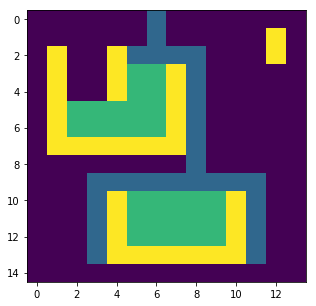

In [10]:
part1(test, aspect='auto');

Part 1: 42429
Part 2: 35998


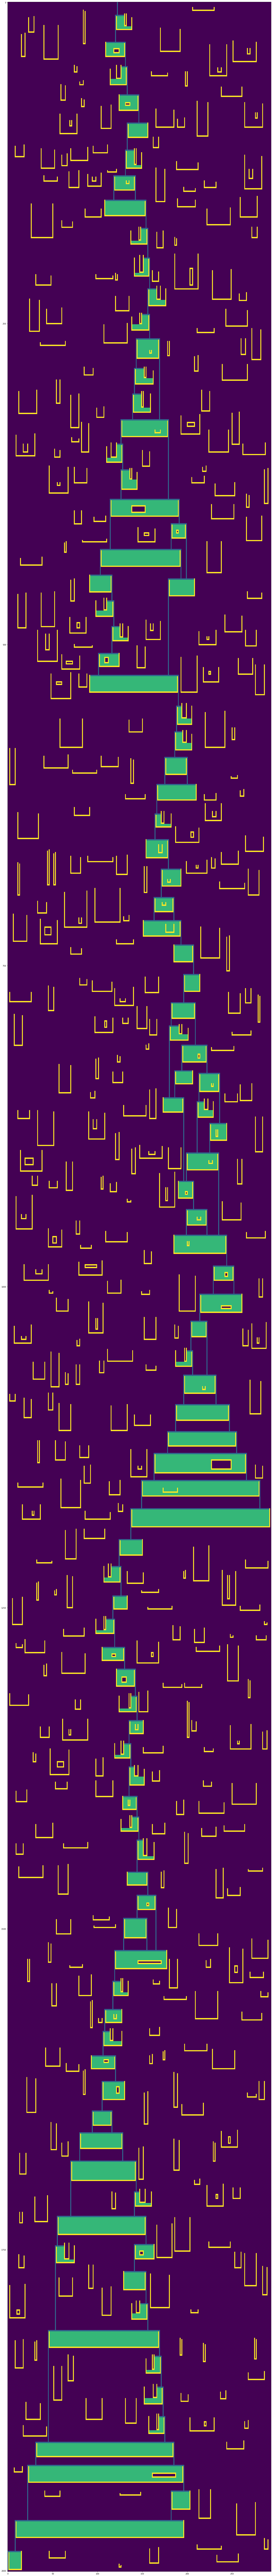

In [11]:
clay, flud, watr = part1(data, figsize=(25, 250), aspect='auto')